## Filter Methods: Statistical & Ranking Methods

**Statistical Ranking Methods:**

1. **Information Gain - Mutual Information**

    Mutual Information measures how much information the presence/absence of a feature contributes to making the correct prediction on target Y. It measures how much knowing about one variable reduces the uncertainity about the other.

2. **Fisher Score**
3. **Univariate Tests**
4. **Univariate ROC/AUC/RMSE**

**Two Steps:**

1. Rank features based on certain criteria/metric.
2. Select features with highest ranking.

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# mutual_info_classif, mutual_info_regression: Functions for calculating Mutual Information Between classes and the target
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv('paribas_data.csv', nrows=50000)
df.shape

(50000, 133)

In [3]:
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
# Get Numerical features from dataset# Get N 
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [5]:
data = df[numerical_features]

In [6]:
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [8]:
X = data.drop(['target','ID'], axis=1)
X.head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [9]:
y = data['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35000, 112), (35000,), (15000, 112), (15000,))

### Mutual Information using Classification

In [11]:
# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_classif(X_train.fillna(0), y_train)
mutual_info

array([0.00074792, 0.00246804, 0.00333645, 0.00367141, 0.00435105,
       0.00507461, 0.00289509, 0.0007722 , 0.02604885, 0.00280164,
       0.01214547, 0.00450368, 0.01993269, 0.00351468, 0.00265934,
       0.00274815, 0.        , 0.00518299, 0.        , 0.01347606,
       0.        , 0.00098855, 0.00193108, 0.00506115, 0.00360069,
       0.0047485 , 0.00430393, 0.00591386, 0.01130907, 0.0035892 ,
       0.00460846, 0.00324153, 0.00331045, 0.00739521, 0.00279414,
       0.0042852 , 0.0058836 , 0.00339693, 0.00825755, 0.00068457,
       0.00229109, 0.003964  , 0.00470667, 0.03925782, 0.00455757,
       0.00444742, 0.00448054, 0.00479864, 0.00565778, 0.00478249,
       0.00425225, 0.00348878, 0.00444248, 0.01844934, 0.00582928,
       0.00134256, 0.004563  , 0.00491971, 0.00175906, 0.00328674,
       0.00372396, 0.00317925, 0.00551397, 0.0060435 , 0.00177107,
       0.00282868, 0.00409182, 0.00398409, 0.00879152, 0.00445708,
       0.00355007, 0.00403347, 0.00430493, 0.00589912, 0.00105

In [12]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

v50     0.039258
v10     0.026049
v14     0.019933
v62     0.018449
v129    0.014391
v21     0.013476
v12     0.012145
v34     0.011309
v114    0.009575
v82     0.008792
v44     0.008258
v39     0.007395
v106    0.007251
v100    0.007126
v122    0.006499
v108    0.006376
v111    0.006349
v116    0.006249
v76     0.006043
v33     0.005914
v87     0.005899
v42     0.005884
v117    0.005856
v99     0.005838
v63     0.005829
v121    0.005773
v57     0.005658
v73     0.005514
v103    0.005435
v101    0.005375
          ...   
v72     0.003179
v104    0.003017
v8      0.002895
v78     0.002829
v11     0.002802
v40     0.002794
v17     0.002748
v16     0.002659
v98     0.002620
v120    0.002500
v2      0.002468
v46     0.002291
v95     0.002194
v26     0.001931
v77     0.001771
v68     0.001759
v128    0.001608
v92     0.001412
v97     0.001365
v64     0.001343
v115    0.001154
v88     0.001050
v25     0.000989
v9      0.000772
v1      0.000748
v45     0.000685
v18     0.000000
v20     0.0000

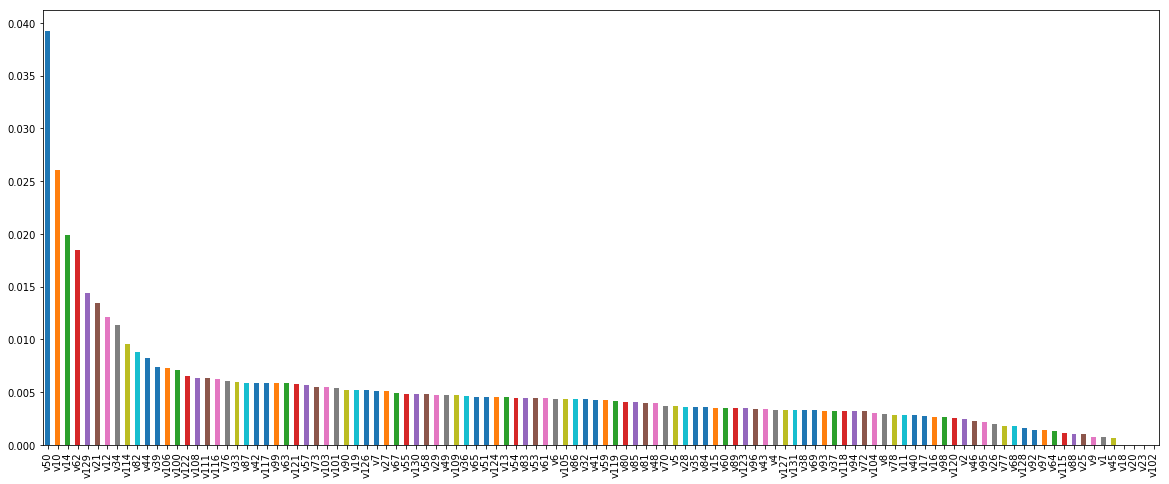

In [13]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

As we can see in the plot above from left to right, the features which have the most amount of mutual information is on the left and the features with the least amount of mutual information are on the right. Some of the features contribute a lot to the mutual information whereas some of them do not contribute anything. So, to select the important features from this list, we can set a threshold like maybe select the first 10 percentile of features or first 20 features etc.

To do this we can use a combination of "SelectKbest" or "SelectPercentile".

In [14]:
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
print('Selected top 10 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 10 features: Index(['v10', 'v12', 'v14', 'v21', 'v34', 'v50', 'v62', 'v114', 'v129',
       'v130'],
      dtype='object')


### Mutual Information using Regression

In [15]:
# Load Dataset
df = pd.read_csv('house_price_data.csv')
df.shape

(1460, 81)

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
# Get Numerical features from dataset# Get N 
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [18]:
data = df[numerical_features]

In [19]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [20]:
X = data.drop(['SalePrice'], axis=1)
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [21]:
y = data['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [22]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 37), (1022,), (438, 37), (438,))

In [23]:
# Mutual Information Regressor
# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

C:\Users\ad1026858\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([0.04415535, 0.28360059, 0.2112001 , 0.15565001, 0.57607257,
       0.12896011, 0.34730435, 0.27939457, 0.10954024, 0.15414171,
       0.01168832, 0.12193345, 0.4050485 , 0.31570527, 0.20720647,
       0.00170838, 0.47453986, 0.03865003, 0.        , 0.25143884,
       0.05917752, 0.0669098 , 0.03013139, 0.18372525, 0.1689564 ,
       0.27995897, 0.38297327, 0.39746079, 0.10307469, 0.17393328,
       0.02630162, 0.01057793, 0.00474766, 0.00556237, 0.00920031,
       0.        , 0.02006945])

In [24]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

OverallQual      0.576073
GrLivArea        0.474540
TotalBsmtSF      0.405048
GarageArea       0.397461
GarageCars       0.382973
YearBuilt        0.347304
1stFlrSF         0.315705
MSSubClass       0.283601
GarageYrBlt      0.279959
YearRemodAdd     0.279395
FullBath         0.251439
LotFrontage      0.211200
2ndFlrSF         0.207206
TotRmsAbvGrd     0.183725
OpenPorchSF      0.173933
Fireplaces       0.168956
LotArea          0.155650
BsmtFinSF1       0.154142
OverallCond      0.128960
BsmtUnfSF        0.121933
MasVnrArea       0.109540
WoodDeckSF       0.103075
BedroomAbvGr     0.066910
HalfBath         0.059178
Id               0.044155
BsmtFullBath     0.038650
KitchenAbvGr     0.030131
EnclosedPorch    0.026302
YrSold           0.020069
BsmtFinSF2       0.011688
3SsnPorch        0.010578
MiscVal          0.009200
PoolArea         0.005562
ScreenPorch      0.004748
LowQualFinSF     0.001708
MoSold           0.000000
BsmtHalfBath     0.000000
dtype: float64

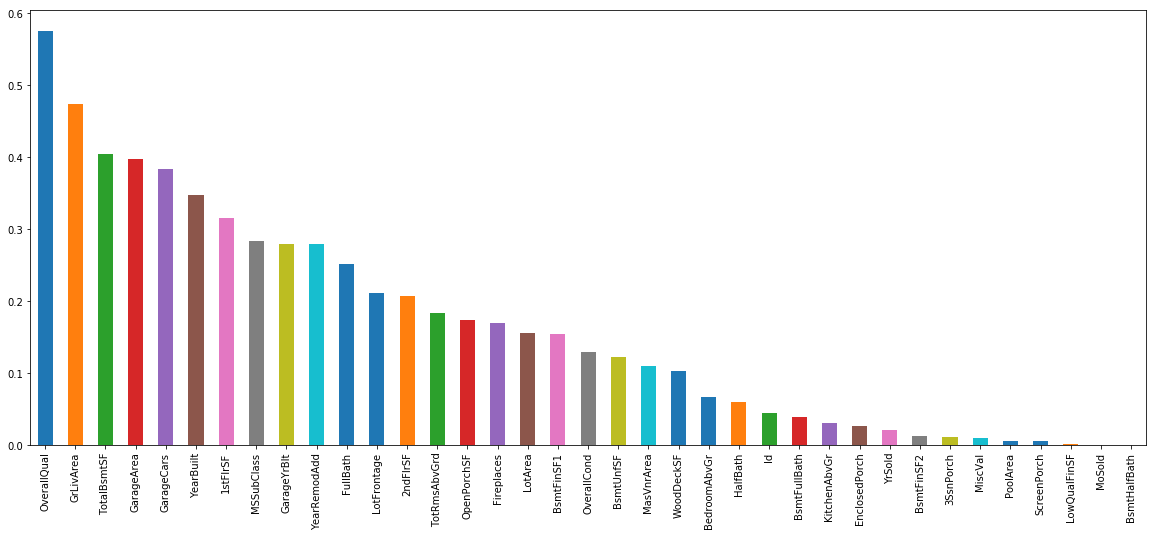

In [25]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [28]:
# Select K best features
k_percentile_features = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train.fillna(0), y_train)
print('Selected top 10 percentile features: {}'.format(X_train.columns[k_percentile_features.get_support()]))

Selected top 10 percentile features: Index(['FullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars'], dtype='object')
